### Nonlinear Regression

##### Import Packages and Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

#import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("data-tax-gnp-bd.csv")
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


In [27]:
statMDL = smf.ols('GNP~YEAR+POPULATION+TAX', data=df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3686.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.78e-45
Time:                        01:54:59   Log-Likelihood:                -258.75
No. Observations:                  40   AIC:                             525.5
Df Residuals:                      36   BIC:                             532.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.299e+05   1.45e+05     -5.723      0.0

##### Regression plot

C:\Users\Pappu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

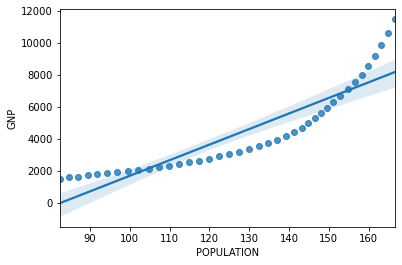

In [28]:
sns.regplot(df.POPULATION, y=df.GNP)

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

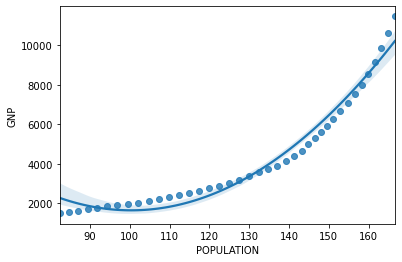

In [29]:
#Regression line in order=2
sns.regplot(x=df.POPULATION, y=df.GNP, data=df, order=2)

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

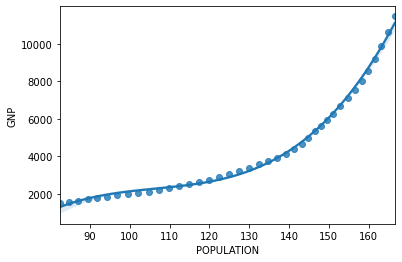

In [30]:
#Regression line in order=3
sns.regplot(x=df.POPULATION, y=df.GNP, data=df, order=3)

##### Now Understand that order 3 is perfect for Polynomial regression. So transform the data into 3 degree order.
##### When reshape data use(-1, 1) if you have one feature/column. On the other hand use (1, -1) if you have more than one feature/column.

In [31]:
x = df['POPULATION'].values.reshape(-1,1)
y = df['GNP'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
    
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
x_ = pf.fit_transform(x)
x_test_ = pf.fit_transform(x_test)



##### There is no alternative function for the polynomial regression. Polynomial set the feature by transformaing the data. Linear function is also used in polynomial regression.

In [32]:
poly = LinearRegression()
poly.fit(x_, y)
poly.coef_

array([[ 0.00000000e+00,  1.20802698e+03, -1.11503188e+01,
         3.49081200e-02]])

##### Accuracy Checking

In [40]:
Predictions = poly.predict(x_test_)

print('Coefficients:', poly.coef_)
print('Intercept:', poly.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))
accuracy = poly.score(x_test_, y_test)
print('AccuracyII:', accuracy*100,"%")

Coefficients: [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept: [-42077.21061321]
MAE: 97.78921702434744
MSE: 18572.673073475253
RMSE: 136.28159477154372
AccuracyII: 99.76117210247534 %


##### We see that non-linear model can make about 99% accurate prediction.

##### Final Prediction using this model. Think that our population is 200 millions, what will be our GNP.


In [42]:
yhat = {'POPULATION':[200]}
yhatDf = pd.DataFrame(yhat)
yhatDfReshape = yhatDf['POPULATION'].values.reshape(-1,1)

polyfit = pf.fit_transform(yhatDfReshape)
poly.predict(polyfit)

array([[32780.39276676]])

##### So when the population become 200 million, our GNP will be 32780.39 billion

#### Compare the performance of our model with the linear regression model

In [45]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

predictionsLN = linreg.predict(x_test)

print('Coffecient:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictionsLN))
print('MSE:', metrics.mean_squared_error(y_test, predictionsLN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsLN)))
accuracy = linreg.score(x_test, y_test)
print('AccuracyII:', accuracy*100,'%')

Coffecient: [[100.14883252]]
Intercept: [-8431.28106286]
MAE: 1299.7312045114136
MSE: 2155272.7183888806
RMSE: 1468.084710903591
AccuracyII: 72.28512826943647 %
